In [1]:
library(Seurat)
library(dplyr)
library(magrittr)
IRdisplay::display_html("<style> .container { width:95% !important; } </style>")
library("xlsx")
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
bcc_all_metadata<-readRDS("/media/garret/New Volume/scRNAseq_data/Personalis/bcc_all_metadata.rds")
bcc_scRNA_counts<-readRDS("/media/garret/New Volume/scRNAseq_data/Personalis/bcc_scRNA_counts.rds")
bcc_tcell_metadata<-readRDS("/media/garret/New Volume/scRNAseq_data/Personalis/bcc_tcell_metadata.rds")
bcc_tcr<-readRDS("/media/garret/New Volume/scRNAseq_data/Personalis/bcc_tcr.rds")

In [3]:
dim(bcc_all_metadata)
dim(bcc_scRNA_counts)
dim(bcc_tcell_metadata)
dim(bcc_tcr)

[1] 53030     7

[1] 23309 53030

[1] 33106     6

[1] 28408     2

In [4]:
unique(bcc_all_metadata$treatment)
unique(bcc_all_metadata$patient)

[1] "post" "pre"

[1] "su001" "su002" "su003" "su004" "su005" "su006" "su007" "su008" "su009"
[10] "su010" "su012"

# Joint Clustering of 22 samples using Seurat V3

In [39]:
all<-CreateSeuratObject(counts = bcc_scRNA_counts, min.cells = 3, min.features = 200, project = "Yost")


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [40]:
mito.features <- grep(pattern = "^MT-", x = rownames(x = all), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = all, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = all, slot = 'counts'))
all[['percent.mito']] <- percent.mito


In [15]:
#all<- subset(x = all, subset = nCount_RNA > 700 & nCount_RNA < 20000 & percent.mito < 0.10) # this time respect authors threshold

In [41]:
# subsettting data into individual samples
su001_pre<-subset(all,cells=subset(bcc_all_metadata,patient=="su001" & treatment=="pre")$cell.id)
su001_post<-subset(all,cells=subset(bcc_all_metadata,patient=="su001" & treatment=="post")$cell.id)
su002_pre<-subset(all,cells=subset(bcc_all_metadata,patient=="su002" & treatment=="pre")$cell.id)
su002_post<-subset(all,cells=subset(bcc_all_metadata,patient=="su002" & treatment=="post")$cell.id)
su003_pre<-subset(all,cells=subset(bcc_all_metadata,patient=="su003" & treatment=="pre")$cell.id)
su003_post<-subset(all,cells=subset(bcc_all_metadata,patient=="su003" & treatment=="post")$cell.id)
su004_pre<-subset(all,cells=subset(bcc_all_metadata,patient=="su004" & treatment=="pre")$cell.id)
su004_post<-subset(all,cells=subset(bcc_all_metadata,patient=="su004" & treatment=="post")$cell.id)
su005_pre<-subset(all,cells=subset(bcc_all_metadata,patient=="su005" & treatment=="pre")$cell.id)
su005_post<-subset(all,cells=subset(bcc_all_metadata,patient=="su005" & treatment=="post")$cell.id)
su006_pre<-subset(all,cells=subset(bcc_all_metadata,patient=="su006" & treatment=="pre")$cell.id)
su006_post<-subset(all,cells=subset(bcc_all_metadata,patient=="su006" & treatment=="post")$cell.id)
su007_pre<-subset(all,cells=subset(bcc_all_metadata,patient=="su007" & treatment=="pre")$cell.id)
su007_post<-subset(all,cells=subset(bcc_all_metadata,patient=="su007" & treatment=="post")$cell.id)
su008_pre<-subset(all,cells=subset(bcc_all_metadata,patient=="su008" & treatment=="pre")$cell.id)
su008_post<-subset(all,cells=subset(bcc_all_metadata,patient=="su008" & treatment=="post")$cell.id)
su009_pre<-subset(all,cells=subset(bcc_all_metadata,patient=="su009" & treatment=="pre")$cell.id)
su009_post<-subset(all,cells=subset(bcc_all_metadata,patient=="su009" & treatment=="post")$cell.id)
su010_pre<-subset(all,cells=subset(bcc_all_metadata,patient=="su010" & treatment=="pre")$cell.id)
su010_post<-subset(all,cells=subset(bcc_all_metadata,patient=="su010" & treatment=="post")$cell.id)
su012_pre<-subset(all,cells=subset(bcc_all_metadata,patient=="su012" & treatment=="pre")$cell.id)
su012_post<-subset(all,cells=subset(bcc_all_metadata,patient=="su012" & treatment=="post")$cell.id)

# Integration(Log-normalize)

In [44]:
su001_pre<- NormalizeData(object = su001_pre,verbose = FALSE) 
su001_post<- NormalizeData(object =su001_post,verbose = FALSE) 
su002_pre<- NormalizeData(object = su002_pre,verbose = FALSE) 
su002_post<- NormalizeData(object =su002_post,verbose = FALSE) 
su003_pre<- NormalizeData(object = su003_pre,verbose = FALSE) 
su003_post<- NormalizeData(object =su003_post,verbose = FALSE) 
su004_pre<- NormalizeData(object = su004_pre,verbose = FALSE) 
su004_post<- NormalizeData(object =su004_post,verbose = FALSE) 
su005_pre<- NormalizeData(object = su005_pre,verbose = FALSE) 
su005_post<- NormalizeData(object =su005_post,verbose = FALSE) 
su006_pre<- NormalizeData(object = su006_pre,verbose = FALSE) 
su006_post<- NormalizeData(object =su006_post,verbose = FALSE) 
su007_pre<- NormalizeData(object = su007_pre,verbose = FALSE) 
su007_post<- NormalizeData(object =su007_post,verbose = FALSE) 
su008_pre<- NormalizeData(object = su008_pre,verbose = FALSE) 
su008_post<- NormalizeData(object =su008_post,verbose = FALSE) 
su009_pre<- NormalizeData(object = su009_pre,verbose = FALSE) 
su009_post<- NormalizeData(object =su009_post,verbose = FALSE) 
su010_pre<- NormalizeData(object = su010_pre,verbose = FALSE) 
su010_post<- NormalizeData(object =su010_post,verbose = FALSE) 
su012_pre<- NormalizeData(object = su012_pre,verbose = FALSE) 
su012_post<- NormalizeData(object =su012_post,verbose = FALSE) 

In [45]:
su001_pre<- FindVariableFeatures(object =su001_pre,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
su001_post<- FindVariableFeatures(object =su001_post,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
su002_pre<- FindVariableFeatures(object =su002_pre,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
su002_post<- FindVariableFeatures(object =su002_post,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
su003_pre<- FindVariableFeatures(object =su003_pre,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
su003_post<- FindVariableFeatures(object =su003_post,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
su004_pre<- FindVariableFeatures(object =su004_pre,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
su004_post<- FindVariableFeatures(object =su004_post,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
su005_pre<- FindVariableFeatures(object =su005_pre,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
su005_post<- FindVariableFeatures(object =su005_post,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
su006_pre<- FindVariableFeatures(object =su006_pre,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
su006_post<- FindVariableFeatures(object =su006_post,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
su007_pre<- FindVariableFeatures(object =su007_pre,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
su007_post<- FindVariableFeatures(object =su007_post,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
su008_pre<- FindVariableFeatures(object =su008_pre,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
su008_post<- FindVariableFeatures(object =su008_post,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
su009_pre<- FindVariableFeatures(object =su009_pre,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
su009_post<- FindVariableFeatures(object =su009_post,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
su010_pre<- FindVariableFeatures(object =su010_pre,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
su010_post<- FindVariableFeatures(object =su010_post,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
su012_pre<- FindVariableFeatures(object =su012_pre,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
su012_post<- FindVariableFeatures(object =su012_post,selection.method = "vst", nfeatures = 2000, verbose = FALSE)

In [46]:
su.list<-objects()
su.list$su001_pre<-su001_pre
su.list$su001_post<-su001_post
su.list$su002_pre<-su002_pre
su.list$su002_post<-su002_post
su.list$su003_pre<-su003_pre
su.list$su003_post<-su003_post
su.list$su004_pre<-su004_pre
su.list$su004_post<-su004_post
su.list$su005_pre<-su005_pre
su.list$su005_post<-su005_post
su.list$su006_pre<-su006_pre
su.list$su006_post<-su006_post
su.list$su007_pre<-su007_pre
su.list$su007_post<-su007_post
su.list$su008_pre<-su008_pre
su.list$su008_post<-su008_post
su.list$su009_pre<-su009_pre
su.list$su009_post<-su009_post
su.list$su010_pre<-su010_pre
su.list$su010_post<-su010_post
su.list$su012_pre<-su012_pre
su.list$su012_post<-su012_post

Warning message in su.list$su001_pre <- su001_pre:
“Coercing LHS to a list”


In [47]:
reference.list <- su.list[c("su001_pre","su001_post","su002_pre","su002_post","su003_pre","su003_post","su004_pre","su004_post","su005_pre","su005_post","su006_pre","su006_post","su007_pre","su007_post","su008_pre","su008_post","su009_pre","su009_post","su010_pre","su010_post","su012_pre","su012_post")]

In [49]:
su.anchors <- FindIntegrationAnchors(object.list = reference.list, dims = 1:40,k.filter = 100)

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 5085 anchors

Filtering anchors

	Retained 1348 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 674 anchors

Filtering anchors

	Retained 659 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 701 anchors

Filtering anchors

	Retained 640 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1002 anchors

Filtering anchors

	Retained 859 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1018 anchors

Filtering anchors

	Retained 868 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 628 anchors

Filtering anchors

	Retained 495 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 904 anchors

Filterin

	Retained 1250 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 3060 anchors

Filtering anchors

	Retained 1099 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2984 anchors

Filtering anchors

	Retained 1597 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6245 anchors

Filtering anchors

	Retained 3018 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 7415 anchors

Filtering anchors

	Retained 2689 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 8134 anchors

Filtering anchors

	Retained 4780 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 4104 anchors

Filtering anchors

	Retained 1728 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 7111 anchors

Filtering anchors

	Retained 2539 anchors

Running CCA

Merging objects

Finding 

Finding neighborhoods

Finding anchors

	Found 715 anchors

Filtering anchors

	Retained 154 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1021 anchors

Filtering anchors

	Retained 262 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1165 anchors

Filtering anchors

	Retained 240 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 3743 anchors

Filtering anchors

	Retained 637 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 3312 anchors

Filtering anchors

	Retained 842 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 3599 anchors

Filtering anchors

	Retained 719 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 7945 anchors

Filtering anchors

	Retained 1875 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 9359 anchors

Filterin

	Retained 1333 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1164 anchors

Filtering anchors

	Retained 612 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2486 anchors

Filtering anchors

	Retained 1623 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2571 anchors

Filtering anchors

	Retained 1549 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2577 anchors

Filtering anchors

	Retained 1753 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2607 anchors

Filtering anchors

	Retained 1844 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 539 anchors

Filtering anchors

	Retained 323 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 4658 anchors

Filtering anchors

	Retained 1622 anchors

Running CCA

Merging objects

Finding nei

In [50]:
bcc.integrated <- IntegrateData(anchorset = su.anchors, dims = 1:40)

Merging dataset 19 into 16

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 3 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 4 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 14 into 9

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 5 into 1 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 20 into 18

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 22 into 21

Extracting anchors for merged samples

Finding integration vectors

Finding i

In [51]:
library(cowplot)
# switch to integrated assay. The variable features of this assay are
# automatically set during IntegrateData
DefaultAssay(object = bcc.integrated) <- "integrated"

# Run the standard workflow for visualization and clustering
bcc.integrated <- ScaleData(object = bcc.integrated, verbose = FALSE)
bcc.integrated <- RunPCA(object = bcc.integrated, npcs = 40, verbose = FALSE)
bcc.integrated <- RunUMAP(object = bcc.integrated, reduction = "pca", 
    dims = 1:40)


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
23:13:15 UMAP embedding parameters a = 0.9922 b = 1.112

23:13:15 Read 53029 rows and found 40 numeric columns

23:13:15 Using Annoy for neighbor search, n_neighbors = 30

23:13:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:13:21 Writing NN index file to temp file /tmp/RtmppibU3g/file24f0696f0c54

23:13:21 Searching Annoy index using 1 thread, search_k = 3000

23:13:36 Annoy recall = 100%

23:13:36 Commencing smooth kNN distance calibration using 1 thread

23:13:38 Initializing fr

In [64]:
stim<-numeric()
for(i in 1:dim(bcc.integrated@meta.data)[1]){
    temp<-subset(bcc_all_metadata,cell.id==rownames(bcc.integrated@meta.data)[i])
    stim<-c(stim,paste(temp$patient,"_",temp$treatment,sep=""))
}
bcc.integrated@meta.data$stim<-stim

In [68]:
treatment<-numeric()
for(i in 1:dim(bcc.integrated@meta.data)[1]){
    temp<-subset(bcc_all_metadata,cell.id==rownames(bcc.integrated@meta.data)[i])
  treatment<-c(treatment,temp$treatment)
}
bcc.integrated@meta.data$treatment<-treatment

In [69]:
patient<-numeric()
for(i in 1:dim(bcc.integrated@meta.data)[1]){
    temp<-subset(bcc_all_metadata,cell.id==rownames(bcc.integrated@meta.data)[i])
  patient<-c(patient,temp$patient)
}
bcc.integrated@meta.data$patient<-patient

In [123]:
sort<-numeric()
for(i in 1:dim(bcc.integrated@meta.data)[1]){
    temp<-subset(bcc_all_metadata,cell.id==rownames(bcc.integrated@meta.data)[i])
  sort<-c(sort,temp$sort)
}
bcc.integrated@meta.data$sort<-sort

In [127]:
original_cluster<-numeric()
for(i in 1:dim(bcc.integrated@meta.data)[1]){
    temp<-subset(bcc_all_metadata,cell.id==rownames(bcc.integrated@meta.data)[i])
  original_cluster<-c(original_cluster,temp$cluster)
}
bcc.integrated@meta.data$original_cluster<-original_cluster

Warning message:
“ggrepel: 14 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


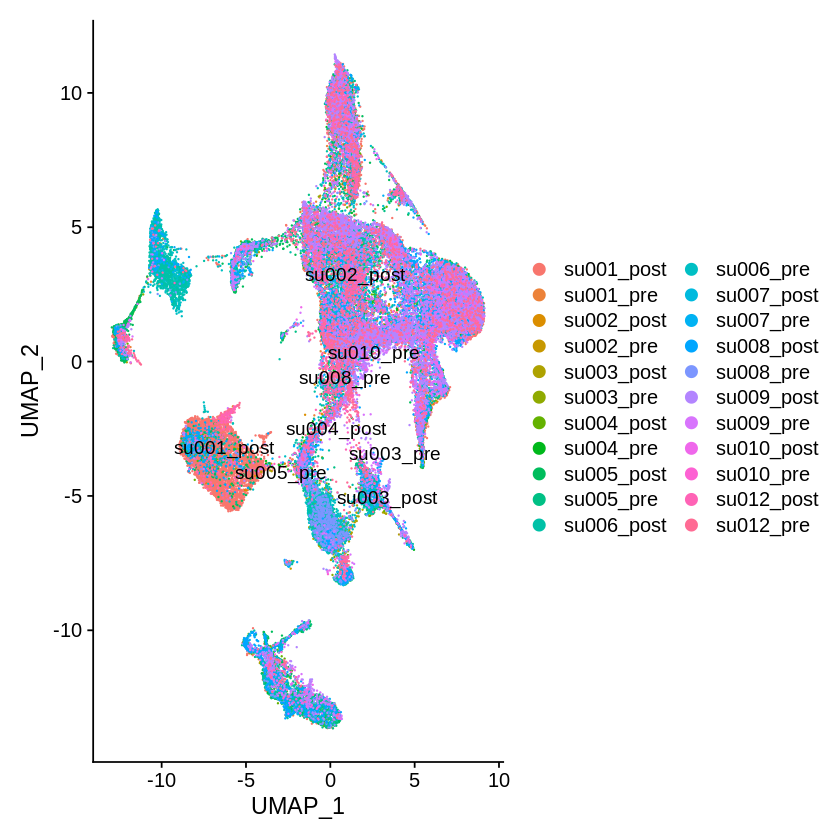

In [70]:
p1 <- DimPlot(object = bcc.integrated, reduction = "umap", group.by = "stim", label = TRUE, repel = TRUE)
plot_grid(p1,label_size = 30)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/all_cell_umap_stim.pdf",width=10,height=10)

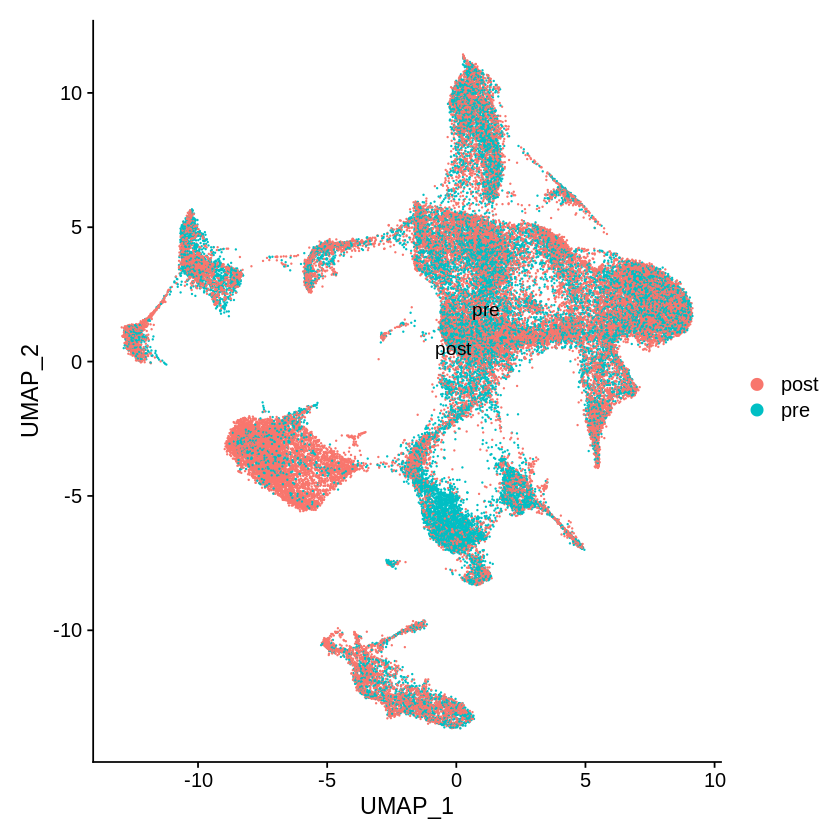

In [71]:
p1 <- DimPlot(object = bcc.integrated, reduction = "umap", group.by = "treatment", label = TRUE, repel = TRUE)
plot_grid(p1,label_size = 30)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/all_cell_umap_treatment.pdf",width=10,height=10)

Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


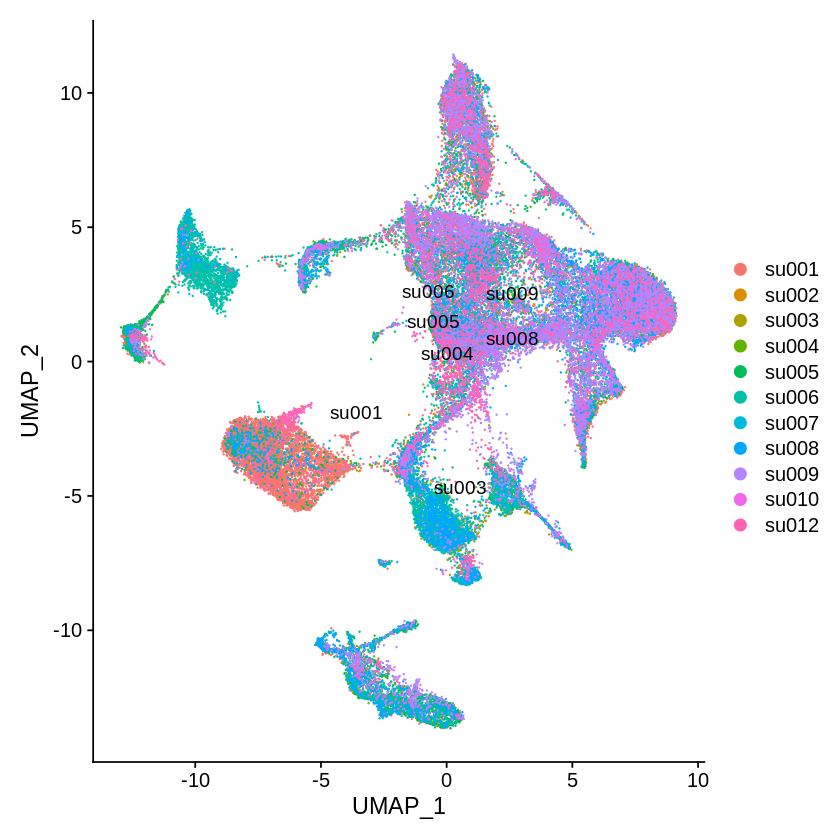

In [72]:
p1 <- DimPlot(object = bcc.integrated, reduction = "umap", group.by = "patient", label = TRUE, repel = TRUE)
plot_grid(p1,label_size = 30)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/all_cell_umap_patient.pdf",width=10,height=10)

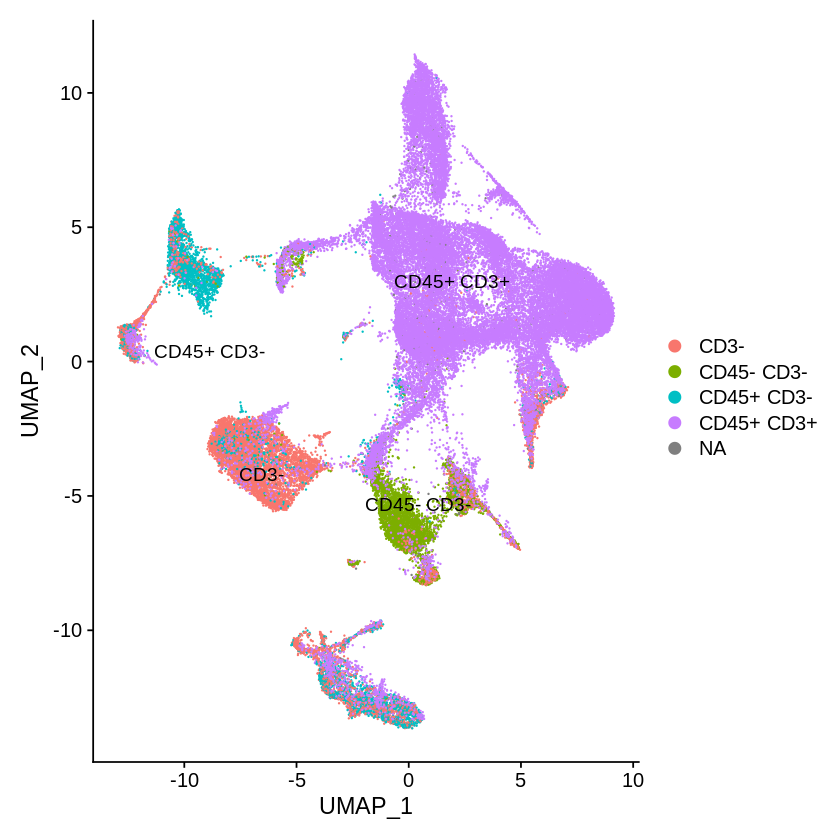

In [124]:
p1 <- DimPlot(object = bcc.integrated, reduction = "umap", group.by = "sort", label = TRUE, repel = TRUE)
plot_grid(p1,label_size = 30)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/all_cell_umap_sort.pdf",width=10,height=10)

# integrated analysis

In [81]:
#used default setting
DefaultAssay(object = bcc.integrated) <- "integrated"
bcc.integrated <- FindNeighbors(object = bcc.integrated)
bcc.integrated <- FindClusters(bcc.integrated, resolution = 0.6)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 53029
Number of edges: 1773632

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9183
Number of communities: 21
Elapsed time: 10 seconds


In [56]:
library(ggplot2)

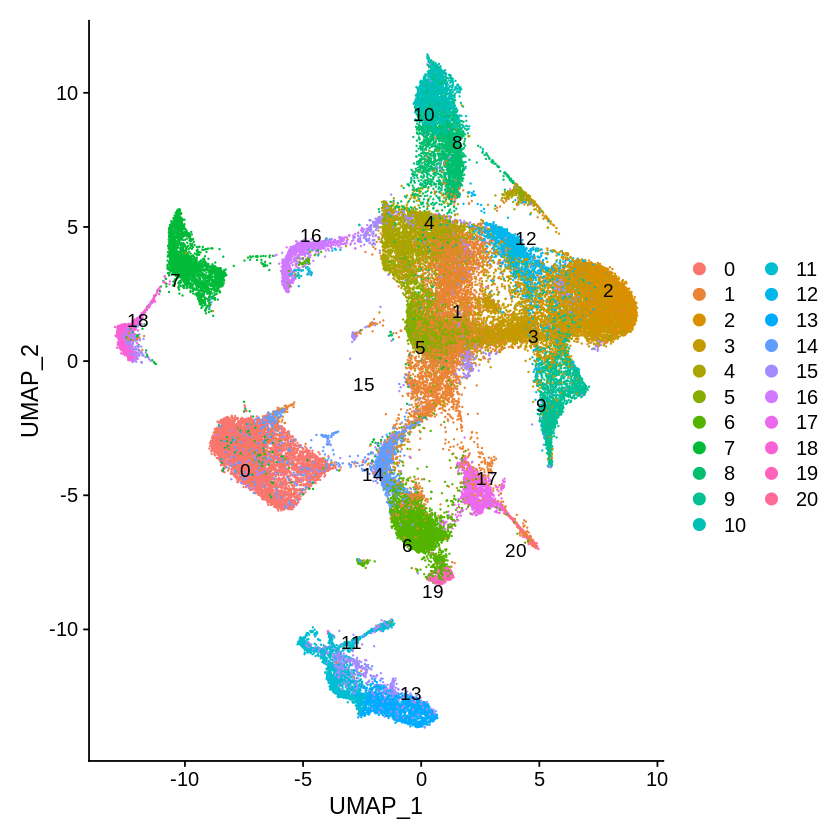

In [82]:
DimPlot(object = bcc.integrated, reduction = "umap", group.by = "integrated_snn_res.0.6", label = TRUE, repel = TRUE) 
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/allcell_umap_number_0.6.pdf",width=10,height=10)

In [83]:
# this is important
DefaultAssay(bcc.integrated) <- "RNA"

In [125]:
saveRDS(bcc.integrated, file = "/media/garret/New Volume/scRNAseq_data/Personalis/bcc.integrated.rds")

# Visualizing gene expression in UMAP space

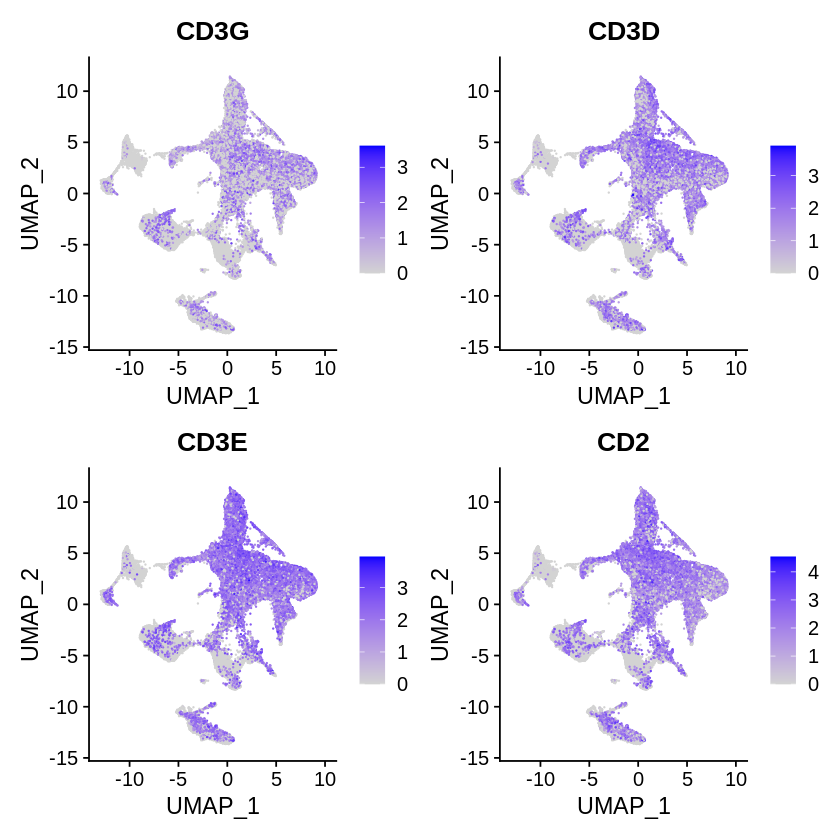

In [101]:
#T cells
FeaturePlot(object =bcc.integrated, features = c("CD3G","CD3D","CD3E","CD2"), cols = c("lightgrey", "blue"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/bcc_UMAP_feature_CD3G_CD3D_CD3E_CD2.pdf",width=10,height=10)

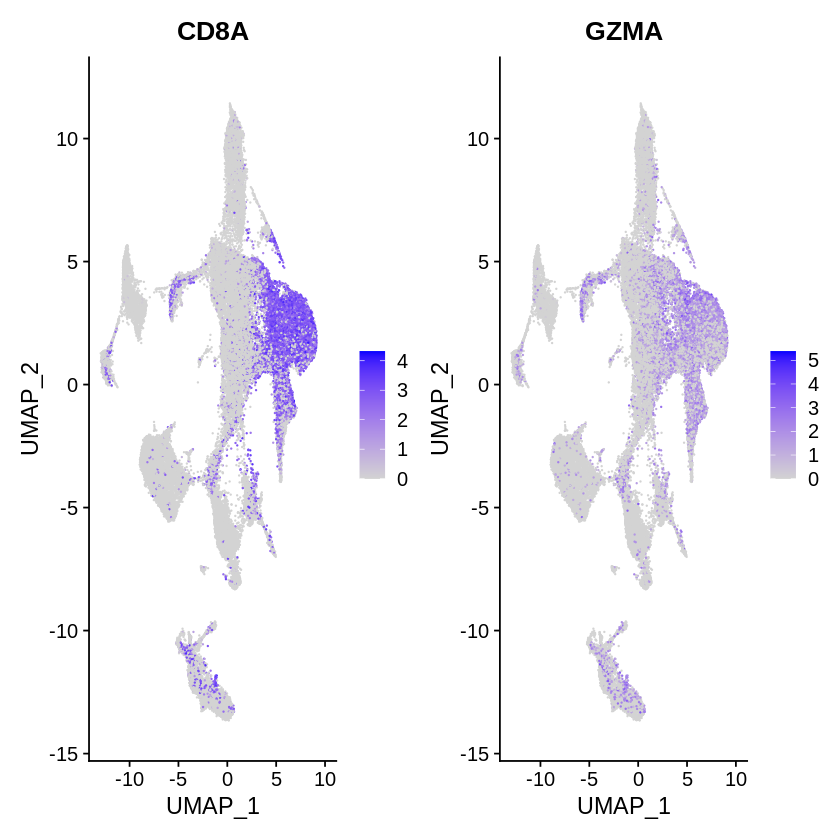

In [102]:
#CD8 T cells
FeaturePlot(object =bcc.integrated, features = c("CD8A","GZMA"), cols = c("lightgrey", "blue"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/bcc_UMAP_feature_CD8A_GZMA.pdf",width=10,height=10)

In [118]:
#CD8 T cells
FeaturePlot(object =bcc.integrated, features = c("CD45","CD3"), cols = c("lightgrey", "blue"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/bcc_UMAP_feature_CD45_CD3.pdf",width=10,height=10)

Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: CD45, CD3”


ERROR: Error: None of the requested features were found: CD45, CD3 in slot data


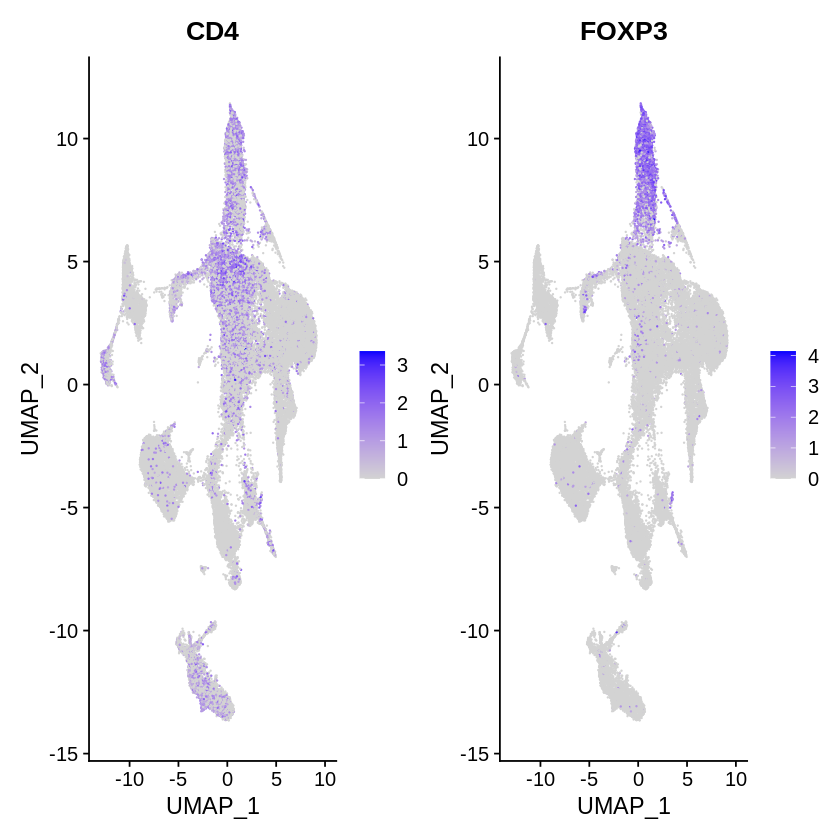

In [103]:
#CD4 T cells
FeaturePlot(object =bcc.integrated, features = c("CD4","FOXP3"), cols = c("lightgrey", "blue"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/bcc_UMAP_feature_CD4_FOXP3.pdf",width=10,height=10)

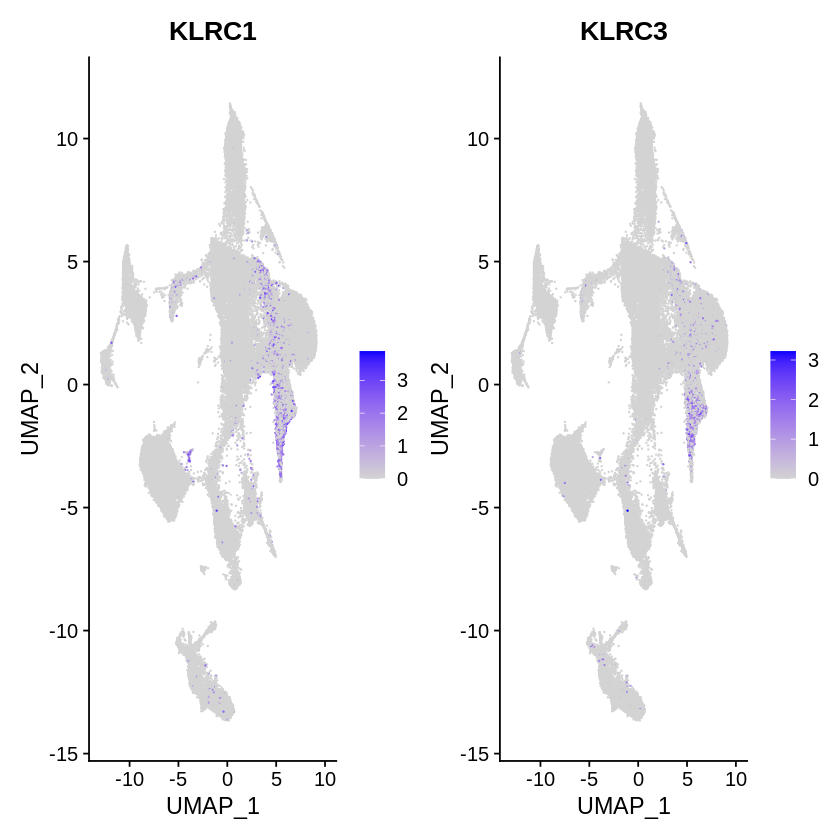

In [104]:
#NKcells
FeaturePlot(object =bcc.integrated, features = c("KLRC1","KLRC3"), cols = c("lightgrey", "blue"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/bcc_UMAP_feature_KLRC1_KLRC3.pdf",width=10,height=10)

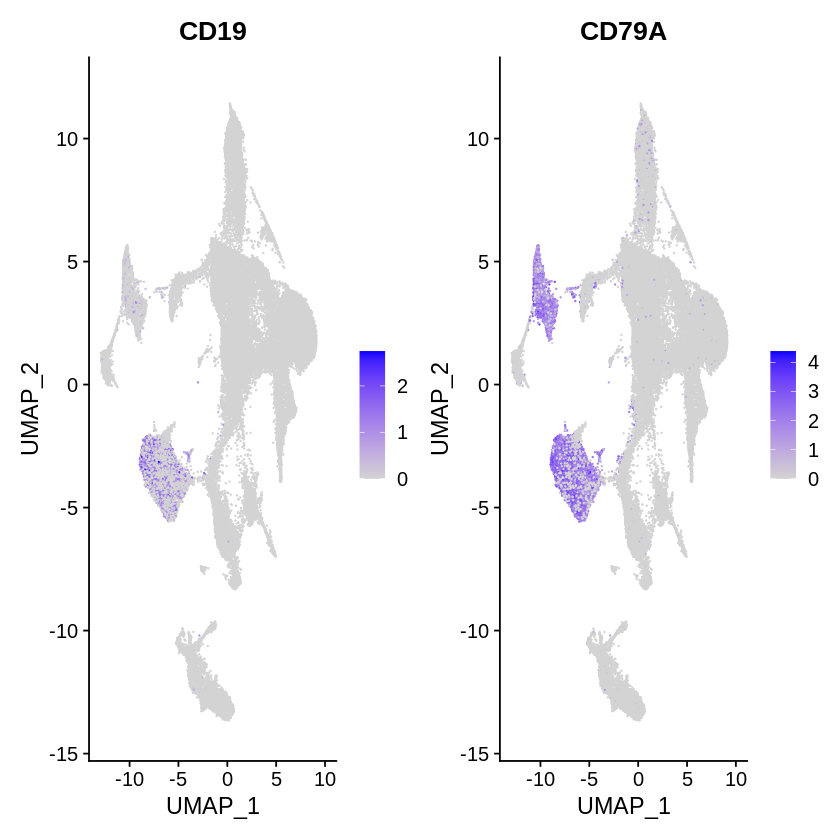

In [105]:
#B cells
FeaturePlot(object =bcc.integrated, features = c("CD19","CD79A"), cols = c("lightgrey", "blue"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/bcc_UMAP_feature_CD19_CD79A.pdf",width=10,height=10)

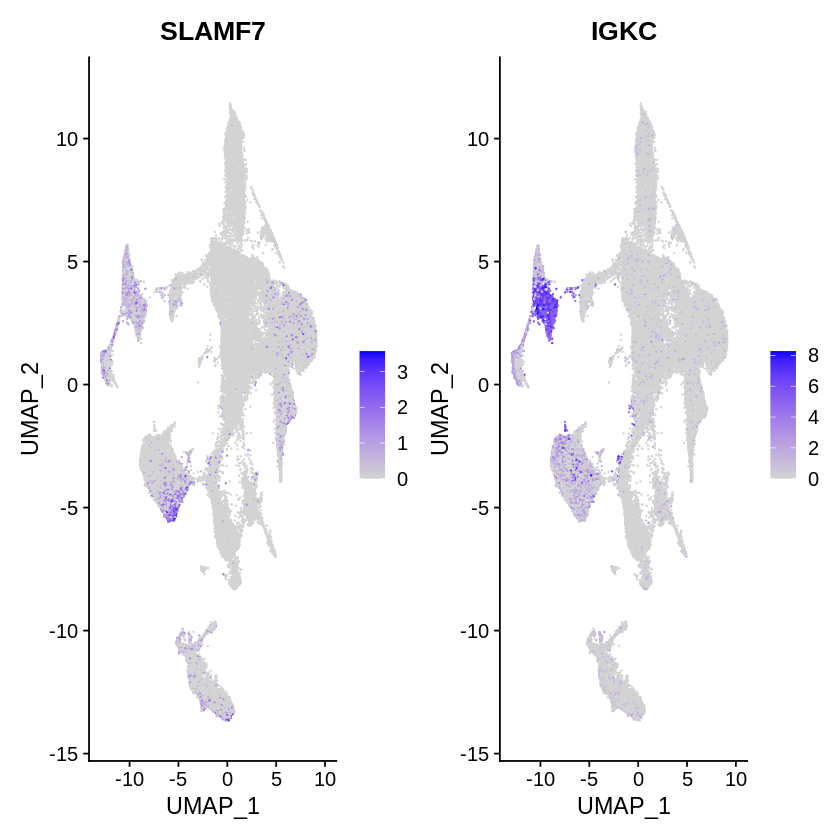

In [106]:
#plasma cells
FeaturePlot(object =bcc.integrated, features = c("SLAMF7","IGKC"), cols = c("lightgrey", "blue"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/bcc_UMAP_feature_SLAMF7_IGKC.pdf",width=10,height=10)

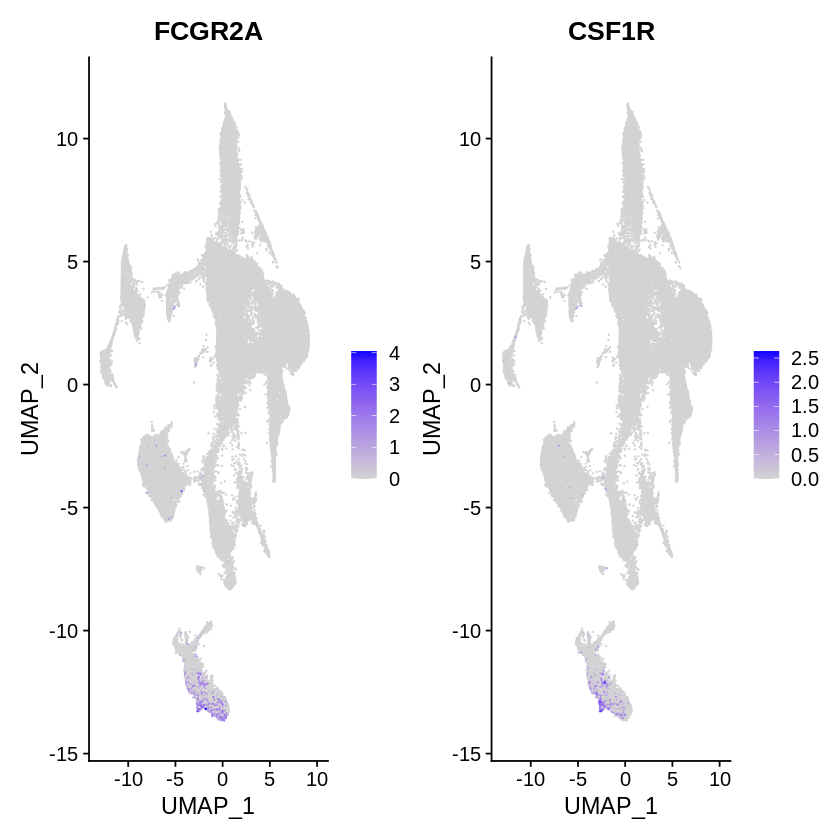

In [107]:
#macrophages
FeaturePlot(object =bcc.integrated, features = c("FCGR2A","CSF1R"), cols = c("lightgrey", "blue"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/bcc_UMAP_feature_FCGR2A_CSF1R.pdf",width=10,height=10)

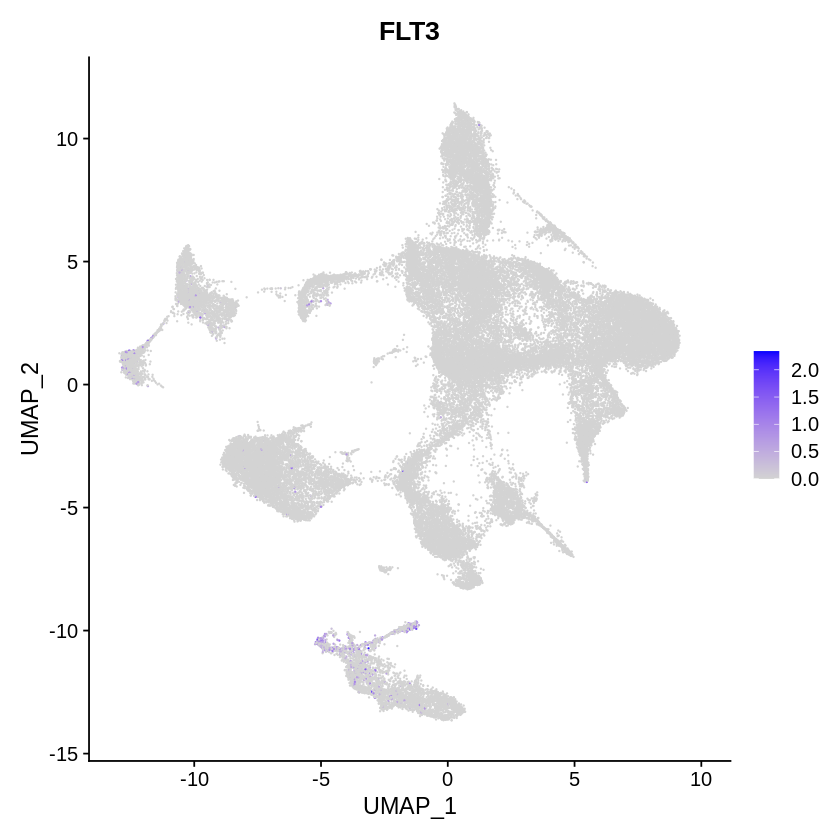

In [108]:
#dendtiric cells
FeaturePlot(object =bcc.integrated, features = c("FLT3"), cols = c("lightgrey", "blue"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/bcc_UMAP_feature_FLT3.pdf",width=10,height=10)

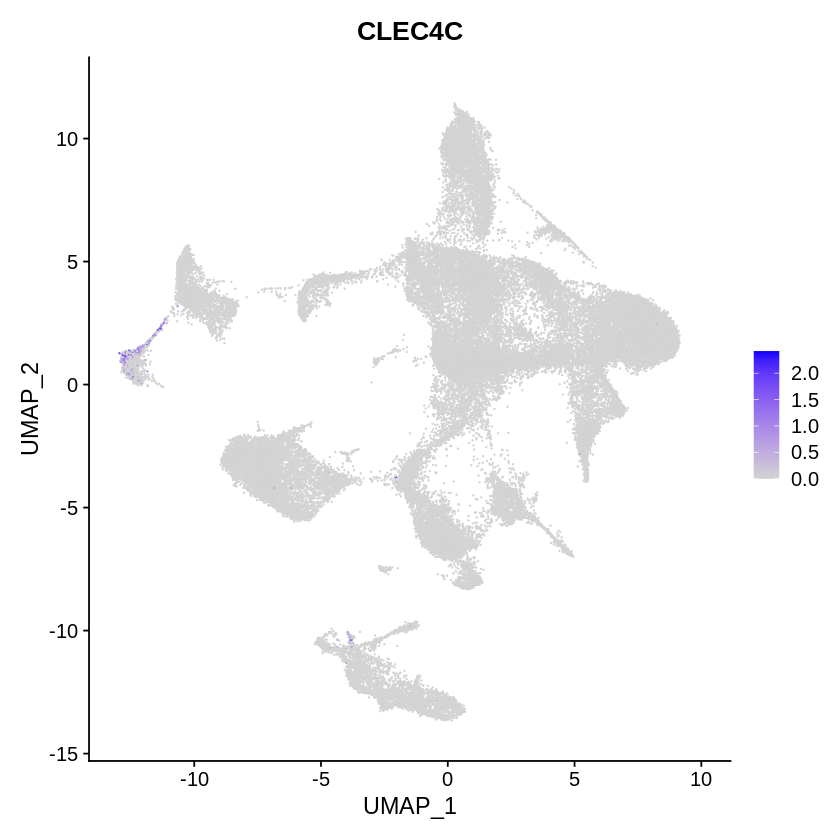

In [109]:
#plasmacytoid dendritic cells
FeaturePlot(object =bcc.integrated, features = c("CLEC4C"), cols = c("lightgrey", "blue"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/bcc_UMAP_feature_CLE4C.pdf",width=10,height=10)

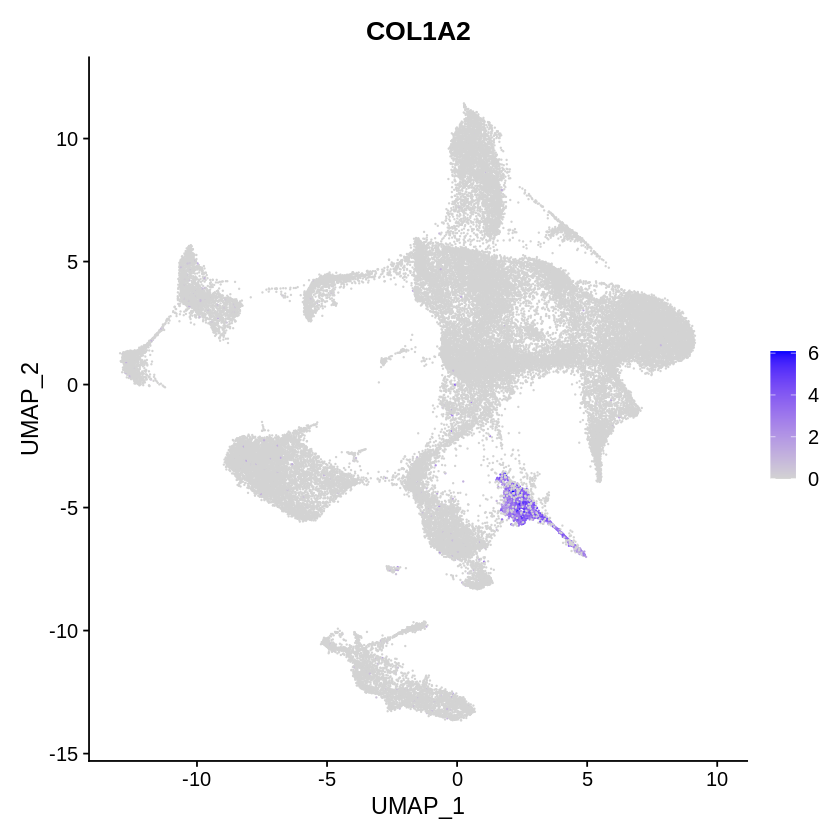

In [110]:
#fibroblasts
FeaturePlot(object =bcc.integrated, features = c("COL1A2"), cols = c("lightgrey", "blue"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/bcc_UMAP_feature_COL1A2.pdf",width=10,height=10)

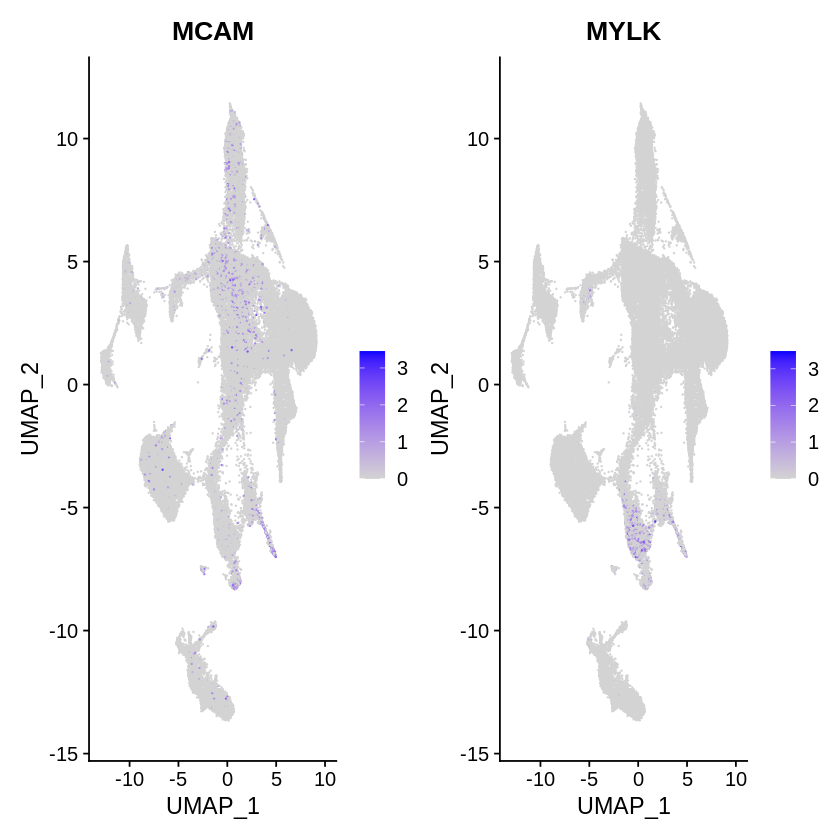

In [111]:
#myofibroblasts
FeaturePlot(object =bcc.integrated, features = c("MCAM","MYLK"), cols = c("lightgrey", "blue"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/bcc_UMAP_feature_MCAM_MYLK.pdf",width=10,height=10)

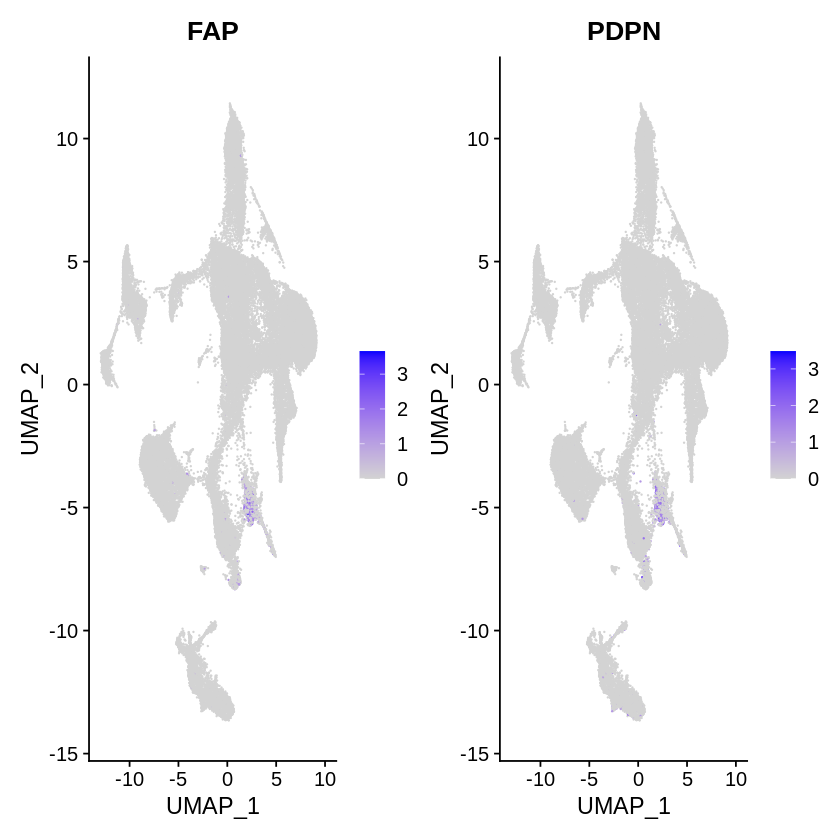

In [112]:
#cancer-associated fibroblast
FeaturePlot(object =bcc.integrated, features = c("FAP","PDPN"), cols = c("lightgrey", "blue"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/bcc_UMAP_feature_FAP_PDPN.pdf",width=10,height=10)

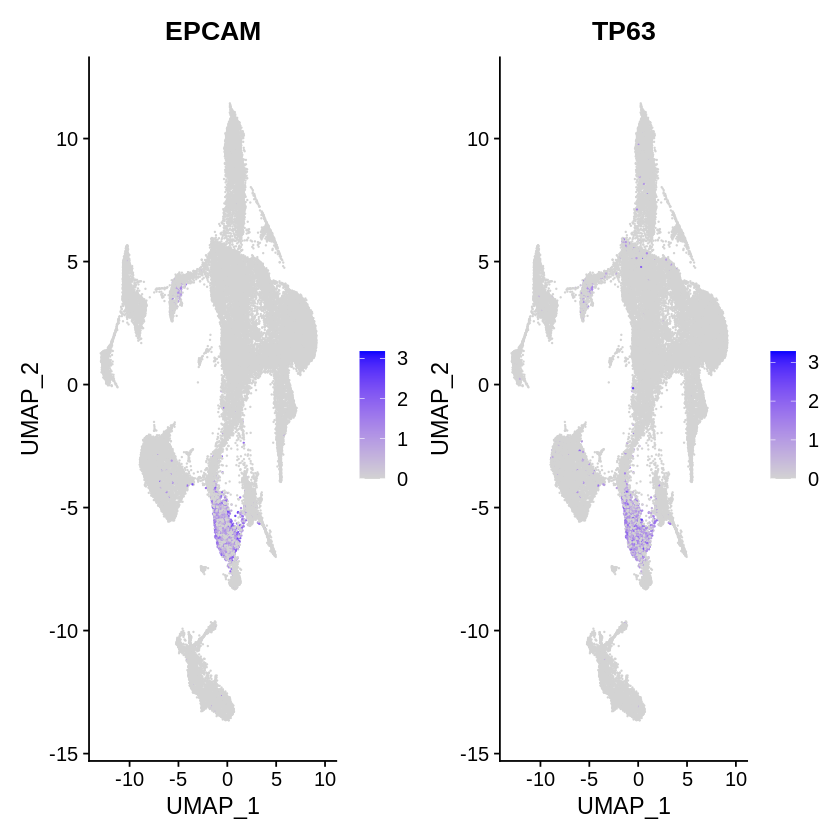

In [113]:
#malignast cells
FeaturePlot(object =bcc.integrated, features = c("EPCAM","TP63"), cols = c("lightgrey", "blue"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/bcc_UMAP_feature_EPCAM_TP63.pdf",width=10,height=10)

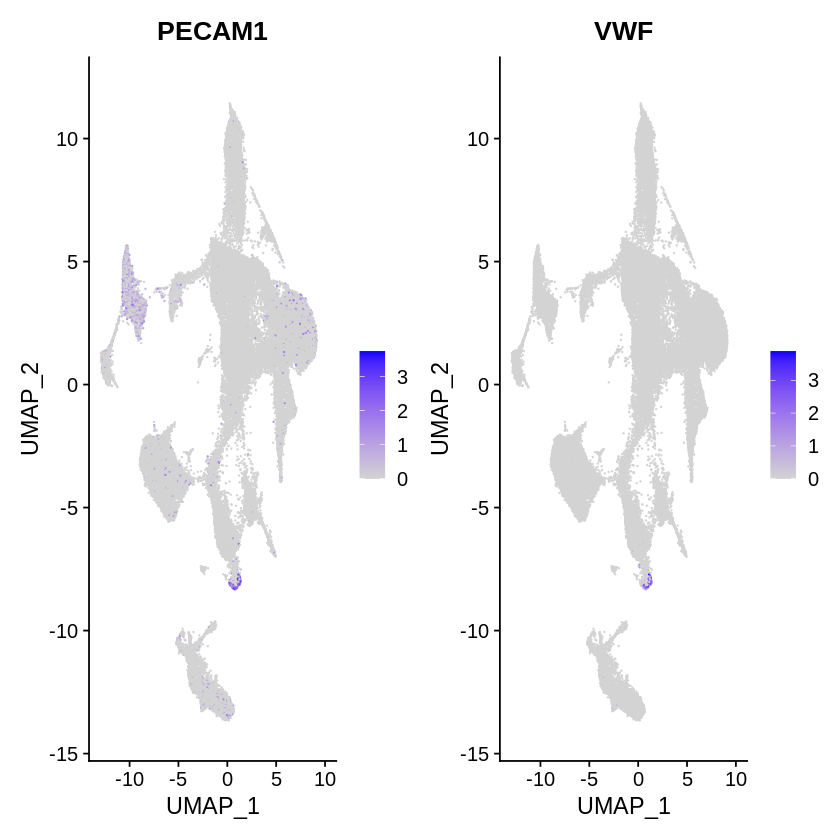

In [114]:
#endothelial cells
FeaturePlot(object =bcc.integrated, features = c("PECAM1","VWF"), cols = c("lightgrey", "blue"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/bcc_UMAP_feature_PECAM1_VWF.pdf",width=10,height=10)

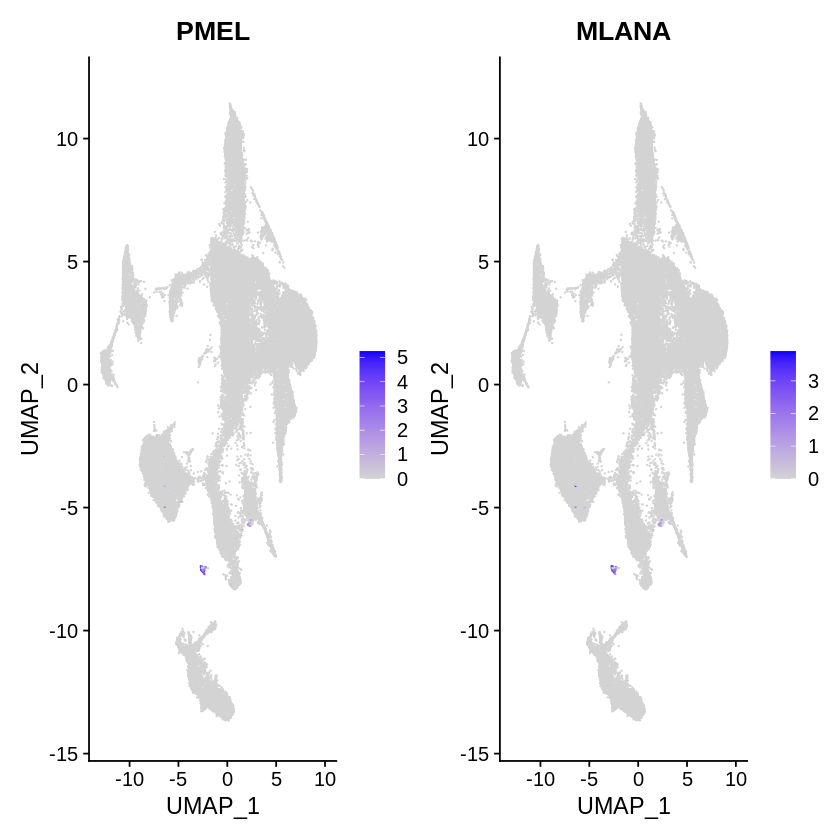

In [115]:
#melanocytes
FeaturePlot(object =bcc.integrated, features = c("PMEL","MLANA"), cols = c("lightgrey", "blue"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/bcc_UMAP_feature_PMEL_MLANA.pdf",width=10,height=10)

# Upload seurat object. You can start from here

In [3]:
# res 0.6
bcc.integrated<-readRDS(file =  "/media/garret/New Volume/scRNAseq_data/Personalis/bcc.integrated.rds")
# this is important
DefaultAssay(bcc.integrated) <- "RNA"

# assgin clusters to cell types

In [4]:
new.ident <- c("Bcell","CD4_Tcell1","CD8_Tcell1","CD8_Tcell2","CD4_Tcell2",
               "CD4_Tcell3","Malignant_cell","Plasma_cell","CD4_Tcell4","NK_cell",
               "CD4_Tcell5","Dendritic_cell","CD8_Tcell3","Macrophage","CD8_Tcell4",
               "CD8_Tcell5","CD8_Tcell6","Fibroblast","Plasmacytoid_dendritic_cell","Endotherial_cell",
               "Myofibroblast")
names(x = new.ident) <- levels(x =bcc.integrated)
bcc.integrated<- RenameIdents(object =bcc.integrated, new.ident)

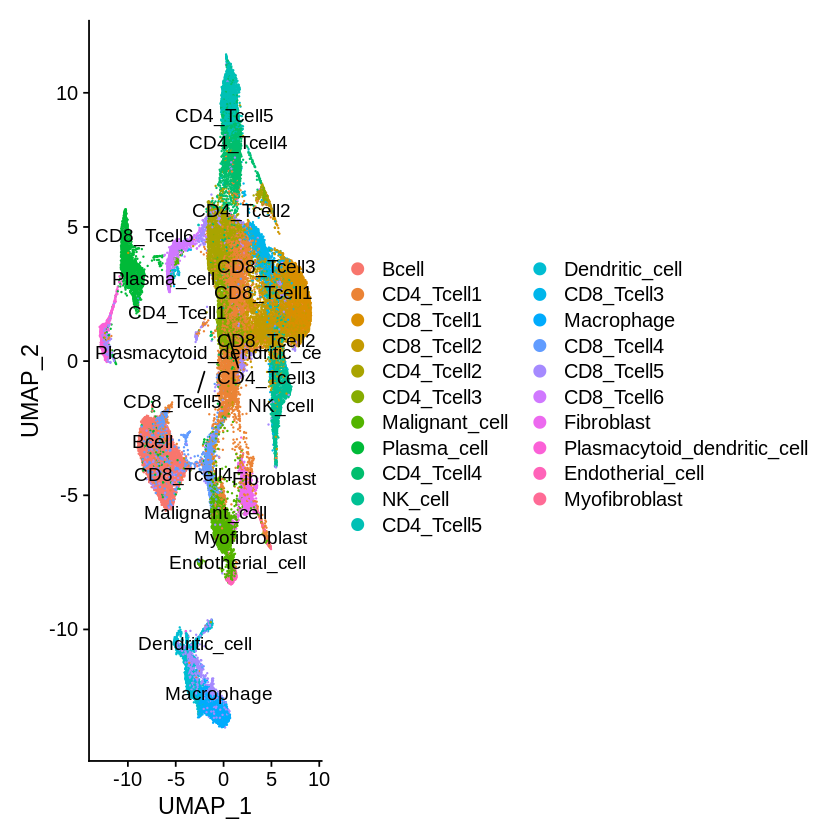

In [133]:
DimPlot(object = bcc.integrated, reduction = "umap", label.size =4, label = TRUE, repel = TRUE) 
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/allcell_umap_name.pdf",width=15,height=10)

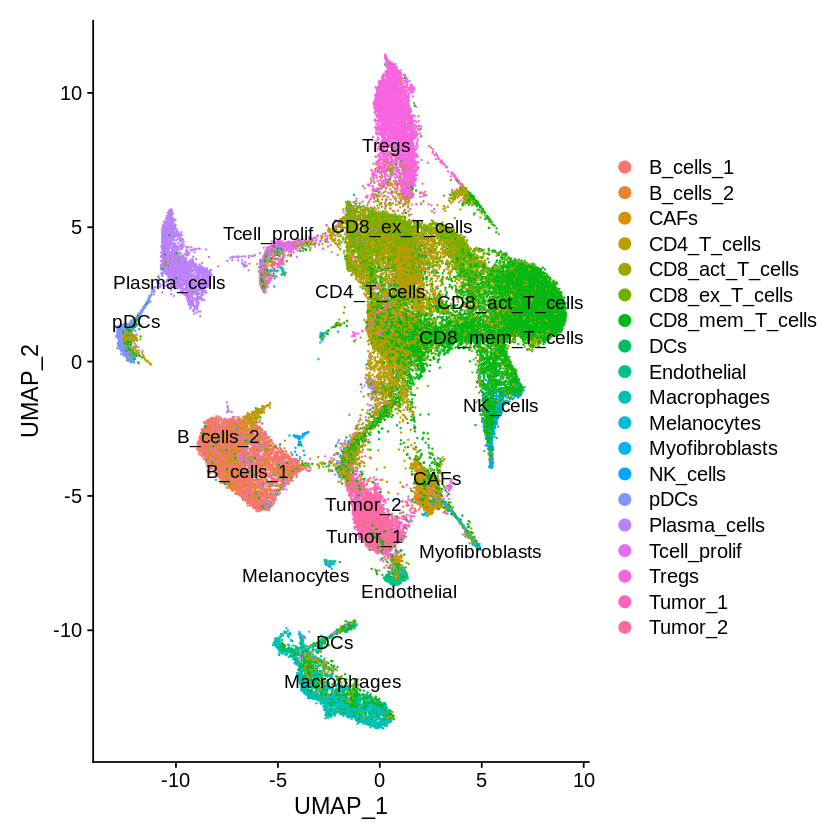

In [131]:
# comparision with my original cluster
p1 <- DimPlot(object = bcc.integrated, reduction = "umap", group.by = "original_cluster", label = TRUE, repel = TRUE)
plot_grid(p1,label_size = 30)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Personalis/all_cell_umap_original_cluster.pdf",width=10,height=10)

In [5]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(bcc.integrated@assays$RNA@data[,which(Idents(object=bcc.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}

In [135]:
T_barcode<-c(CD4_Tcell1_barcode,CD4_Tcell2_barcode,CD4_Tcell3_barcode,CD4_Tcell4_barcode,CD4_Tcell5_barcode,CD8_Tcell1_barcode,CD8_Tcell2_barcode,CD8_Tcell3_barcode,CD8_Tcell4_barcode,CD8_Tcell5_barcode)

In [136]:
saveRDS(T_barcode, file = "/media/garret/New Volume/scRNAseq_data/Personalis/T_id.rds")

# conserved markers for clusters

In [6]:
DefaultAssay(bcc.integrated) <- "integrated"


In [7]:
for (i in 1:length(new.ident)){
one.markers <- FindConservedMarkers(bcc.integrated, ident.1 = new.ident[i], grouping.var = "stim",print.bar = FALSE, min.cells.feature = 1,min.cells.group = 1)
write.xlsx2(one.markers,file=(paste("/media/garret/New Volume/scRNAseq_data/Personalis/Marker/",new.ident[i],"_gene.xlsx",sep="")))}

Warning message:
“Identity: Bcell not present in group su010_pre. Skipping su010_pre”
Warning message:
“Identity: Bcell not present in group su002_pre. Skipping su002_pre”
Testing group su002_post: (Bcell) vs (CD8_Tcell4, CD4_Tcell2, CD4_Tcell1, CD8_Tcell1, CD8_Tcell3, CD4_Tcell3, CD8_Tcell2, CD4_Tcell4, CD4_Tcell5, CD8_Tcell6, Plasma_cell, Fibroblast, NK_cell, Dendritic_cell, Endotherial_cell, Macrophage, Myofibroblast, Plasmacytoid_dendritic_cell)

Warning message:
“Identity: Bcell not present in group su003_pre. Skipping su003_pre”
Testing group su007_post: (Bcell) vs (Dendritic_cell, CD8_Tcell1, CD8_Tcell2, CD4_Tcell5, CD4_Tcell1, CD4_Tcell3, CD8_Tcell4, CD4_Tcell4, Myofibroblast, Malignant_cell, CD8_Tcell3, Plasma_cell, NK_cell, Endotherial_cell, CD8_Tcell6, CD4_Tcell2, Macrophage, Fibroblast, CD8_Tcell5)

Warning message:
“Identity: Bcell not present in group su010_post. Skipping su010_post”
Testing group su004_pre: (Bcell) vs (CD8_Tcell2, CD8_Tcell3, CD4_Tcell4, CD4_Tcell5, CD4_

Testing group su003_post: (CD4_Tcell1) vs (Malignant_cell, Dendritic_cell, Fibroblast, Myofibroblast, Macrophage, CD8_Tcell4, CD4_Tcell2, CD8_Tcell6, Plasmacytoid_dendritic_cell, CD8_Tcell5, NK_cell, Endotherial_cell, CD8_Tcell3, CD4_Tcell4, CD8_Tcell1, CD8_Tcell2, Bcell, CD4_Tcell3, CD4_Tcell5, Plasma_cell)

Testing group su001_pre: (CD4_Tcell1) vs (Malignant_cell, CD4_Tcell5, Dendritic_cell, NK_cell, Macrophage, Endotherial_cell, CD4_Tcell2, Fibroblast, CD8_Tcell3, CD8_Tcell1, CD4_Tcell4, CD4_Tcell3, CD8_Tcell4, CD8_Tcell6, Plasmacytoid_dendritic_cell, CD8_Tcell2, Plasma_cell, Myofibroblast, CD8_Tcell5, Bcell)

Testing group su007_pre: (CD4_Tcell1) vs (CD8_Tcell2, CD4_Tcell3, CD4_Tcell4, CD8_Tcell1, CD8_Tcell4, CD4_Tcell5, CD8_Tcell3, CD4_Tcell2, NK_cell, CD8_Tcell5, CD8_Tcell6, Macrophage, Malignant_cell, Dendritic_cell, Plasma_cell, Plasmacytoid_dendritic_cell, Fibroblast, Myofibroblast, Endotherial_cell, Bcell)

Testing group su008_pre: (CD4_Tcell1) vs (Plasmacytoid_dendritic_cell

Testing group su006_post: (CD8_Tcell1) vs (Macrophage, Plasma_cell, Dendritic_cell, CD8_Tcell5, Plasmacytoid_dendritic_cell, CD8_Tcell6, CD8_Tcell4, Bcell, Fibroblast, NK_cell, CD4_Tcell1, CD8_Tcell3, CD4_Tcell2, CD8_Tcell2, CD4_Tcell3, CD4_Tcell4, CD4_Tcell5, Malignant_cell, Myofibroblast, Endotherial_cell)

Testing group su009_pre: (CD8_Tcell1) vs (CD4_Tcell2, CD8_Tcell5, CD8_Tcell6, CD4_Tcell3, Malignant_cell, CD8_Tcell2, CD8_Tcell3, Dendritic_cell, CD4_Tcell4, CD4_Tcell1, NK_cell, CD4_Tcell5, Fibroblast, CD8_Tcell4, Plasmacytoid_dendritic_cell, Macrophage, Plasma_cell, Bcell, Myofibroblast)

Testing group su009_post: (CD8_Tcell1) vs (CD8_Tcell2, NK_cell, CD8_Tcell5, CD4_Tcell1, CD8_Tcell3, CD4_Tcell3, CD4_Tcell5, Malignant_cell, CD4_Tcell2, CD8_Tcell4, CD4_Tcell4, CD8_Tcell6, Fibroblast, Macrophage, Dendritic_cell, Plasma_cell, Bcell, Plasmacytoid_dendritic_cell, Myofibroblast)

Testing group su008_post: (CD8_Tcell1) vs (CD8_Tcell2, CD4_Tcell3, CD4_Tcell1, NK_cell, CD8_Tcell3, CD8_

Testing group su010_pre: (CD4_Tcell2) vs (CD8_Tcell2, CD4_Tcell3, Malignant_cell, CD4_Tcell1, NK_cell, Fibroblast, CD4_Tcell5, CD8_Tcell5, Plasma_cell, CD8_Tcell3, CD8_Tcell4, Dendritic_cell, CD8_Tcell6, Macrophage)

Testing group su002_pre: (CD4_Tcell2) vs (Macrophage, CD4_Tcell1, Dendritic_cell, NK_cell, Malignant_cell, CD8_Tcell2, CD8_Tcell6, CD4_Tcell4, CD4_Tcell5, Fibroblast, Myofibroblast, Plasma_cell, CD8_Tcell4, CD4_Tcell3, CD8_Tcell3, CD8_Tcell1, CD8_Tcell5, Endotherial_cell)

Testing group su002_post: (CD4_Tcell2) vs (CD8_Tcell4, CD4_Tcell1, CD8_Tcell1, CD8_Tcell3, CD4_Tcell3, CD8_Tcell2, CD4_Tcell4, Bcell, CD4_Tcell5, CD8_Tcell6, Plasma_cell, Fibroblast, NK_cell, Dendritic_cell, Endotherial_cell, Macrophage, Myofibroblast, Plasmacytoid_dendritic_cell)

Testing group su003_pre: (CD4_Tcell2) vs (CD8_Tcell2, CD8_Tcell4, Fibroblast, Malignant_cell, CD4_Tcell4, CD4_Tcell1, Macrophage, CD4_Tcell3, Myofibroblast, CD8_Tcell1, NK_cell, Plasmacytoid_dendritic_cell, Dendritic_cell, CD8

Testing group su012_post: (CD4_Tcell3) vs (CD8_Tcell4, CD8_Tcell5, CD4_Tcell1, CD8_Tcell1, CD8_Tcell6, CD4_Tcell2, CD4_Tcell4, CD8_Tcell2, Macrophage, Malignant_cell, CD8_Tcell3, CD4_Tcell5, Bcell, Fibroblast, Plasma_cell, NK_cell, Plasmacytoid_dendritic_cell, Dendritic_cell)

Testing group su004_post: (CD4_Tcell3) vs (CD8_Tcell2, CD4_Tcell4, CD4_Tcell5, CD4_Tcell1, CD4_Tcell2, Macrophage, CD8_Tcell1, CD8_Tcell3, CD8_Tcell6, NK_cell, CD8_Tcell5, CD8_Tcell4, Dendritic_cell, Fibroblast, Plasmacytoid_dendritic_cell, Malignant_cell, Bcell, Myofibroblast, Plasma_cell, Endotherial_cell)

Testing group su003_post: (CD4_Tcell3) vs (Malignant_cell, Dendritic_cell, Fibroblast, CD4_Tcell1, Myofibroblast, Macrophage, CD8_Tcell4, CD4_Tcell2, CD8_Tcell6, Plasmacytoid_dendritic_cell, CD8_Tcell5, NK_cell, Endotherial_cell, CD8_Tcell3, CD4_Tcell4, CD8_Tcell1, CD8_Tcell2, Bcell, CD4_Tcell5, Plasma_cell)

Testing group su001_pre: (CD4_Tcell3) vs (Malignant_cell, CD4_Tcell5, Dendritic_cell, NK_cell, CD4_T

Testing group su005_pre: (Malignant_cell) vs (Macrophage, CD8_Tcell5, CD4_Tcell1, Dendritic_cell, CD8_Tcell4, Plasmacytoid_dendritic_cell, NK_cell, Plasma_cell, CD4_Tcell3, CD8_Tcell2, Bcell, CD4_Tcell4, CD8_Tcell3, Fibroblast, CD8_Tcell6, CD8_Tcell1, CD4_Tcell2, CD4_Tcell5, Endotherial_cell, Myofibroblast)

Testing group su005_post: (Malignant_cell) vs (CD4_Tcell1, CD8_Tcell3, CD8_Tcell6, CD4_Tcell5, CD4_Tcell4, CD8_Tcell2, CD4_Tcell3, CD8_Tcell1, CD8_Tcell4, NK_cell, CD4_Tcell2, CD8_Tcell5, Dendritic_cell, Bcell, Macrophage, Plasma_cell, Fibroblast, Plasmacytoid_dendritic_cell, Myofibroblast, Endotherial_cell)

Testing group su006_post: (Malignant_cell) vs (Macrophage, Plasma_cell, Dendritic_cell, CD8_Tcell5, Plasmacytoid_dendritic_cell, CD8_Tcell6, CD8_Tcell4, Bcell, Fibroblast, NK_cell, CD4_Tcell1, CD8_Tcell3, CD4_Tcell2, CD8_Tcell2, CD8_Tcell1, CD4_Tcell3, CD4_Tcell4, CD4_Tcell5, Myofibroblast, Endotherial_cell)

Testing group su009_pre: (Malignant_cell) vs (CD8_Tcell1, CD4_Tcell2

Testing group su006_pre: (Plasma_cell) vs (Macrophage, CD8_Tcell5, CD4_Tcell1, Bcell, Dendritic_cell, CD8_Tcell4, Plasmacytoid_dendritic_cell, Fibroblast, CD8_Tcell6, CD8_Tcell2, NK_cell, CD8_Tcell3, CD4_Tcell3, CD8_Tcell1, CD4_Tcell2, CD4_Tcell4, CD4_Tcell5, Endotherial_cell, Malignant_cell, Myofibroblast)

Testing group su001_post: (Plasma_cell) vs (CD8_Tcell1, CD4_Tcell2, CD8_Tcell3, CD4_Tcell3, CD4_Tcell5, CD4_Tcell4, CD8_Tcell6, CD8_Tcell2, NK_cell, CD4_Tcell1, Bcell, CD8_Tcell4, Macrophage, Dendritic_cell, Plasmacytoid_dendritic_cell, Fibroblast, Endotherial_cell, Myofibroblast, CD8_Tcell5, Malignant_cell)

Warning message:
“Identity: CD4_Tcell4 not present in group su010_pre. Skipping su010_pre”
Testing group su002_pre: (CD4_Tcell4) vs (Macrophage, CD4_Tcell1, Dendritic_cell, NK_cell, Malignant_cell, CD8_Tcell2, CD8_Tcell6, CD4_Tcell5, Fibroblast, Myofibroblast, Plasma_cell, CD8_Tcell4, CD4_Tcell3, CD4_Tcell2, CD8_Tcell3, CD8_Tcell1, CD8_Tcell5, Endotherial_cell)

Testing group 

Testing group su010_post: (NK_cell) vs (CD4_Tcell2, CD4_Tcell1, Malignant_cell, CD8_Tcell5, CD8_Tcell2, CD8_Tcell3, Macrophage, CD4_Tcell5, CD4_Tcell4, CD8_Tcell1, Dendritic_cell, Fibroblast, CD4_Tcell3, CD8_Tcell6, CD8_Tcell4, Plasma_cell, Plasmacytoid_dendritic_cell)

Testing group su004_pre: (NK_cell) vs (CD8_Tcell2, CD8_Tcell3, CD4_Tcell4, CD4_Tcell5, CD4_Tcell3, CD8_Tcell1, CD4_Tcell1, CD4_Tcell2, CD8_Tcell4, Bcell, CD8_Tcell6, Dendritic_cell, Macrophage, Fibroblast, Endotherial_cell, Malignant_cell, Plasmacytoid_dendritic_cell, Myofibroblast, Plasma_cell)

Testing group su012_post: (NK_cell) vs (CD8_Tcell4, CD8_Tcell5, CD4_Tcell1, CD8_Tcell1, CD8_Tcell6, CD4_Tcell2, CD4_Tcell4, CD8_Tcell2, Macrophage, Malignant_cell, CD8_Tcell3, CD4_Tcell3, CD4_Tcell5, Bcell, Fibroblast, Plasma_cell, Plasmacytoid_dendritic_cell, Dendritic_cell)

Testing group su004_post: (NK_cell) vs (CD8_Tcell2, CD4_Tcell4, CD4_Tcell5, CD4_Tcell1, CD4_Tcell2, Macrophage, CD4_Tcell3, CD8_Tcell1, CD8_Tcell3, CD8_T

Testing group su007_pre: (CD4_Tcell5) vs (CD4_Tcell1, CD8_Tcell2, CD4_Tcell3, CD4_Tcell4, CD8_Tcell1, CD8_Tcell4, CD8_Tcell3, CD4_Tcell2, NK_cell, CD8_Tcell5, CD8_Tcell6, Macrophage, Malignant_cell, Dendritic_cell, Plasma_cell, Plasmacytoid_dendritic_cell, Fibroblast, Myofibroblast, Endotherial_cell, Bcell)

Testing group su008_pre: (CD4_Tcell5) vs (Plasmacytoid_dendritic_cell, Plasma_cell, Dendritic_cell, Malignant_cell, Bcell, NK_cell, Macrophage, CD8_Tcell3, CD8_Tcell5, CD8_Tcell4, CD4_Tcell1, Fibroblast, Myofibroblast, CD8_Tcell1, CD8_Tcell2, CD8_Tcell6, CD4_Tcell2, CD4_Tcell3, CD4_Tcell4, Endotherial_cell)

Testing group su012_pre: (CD4_Tcell5) vs (CD4_Tcell1, Malignant_cell, CD4_Tcell4, Macrophage, CD4_Tcell3, CD8_Tcell4, CD8_Tcell1, NK_cell, Bcell, CD4_Tcell2, Plasma_cell, CD8_Tcell5, Fibroblast, CD8_Tcell2, CD8_Tcell3, CD8_Tcell6, Dendritic_cell, Plasmacytoid_dendritic_cell)

Testing group su005_pre: (CD4_Tcell5) vs (Macrophage, CD8_Tcell5, CD4_Tcell1, Dendritic_cell, CD8_Tcell

Testing group su009_pre: (Dendritic_cell) vs (CD8_Tcell1, CD4_Tcell2, CD8_Tcell5, CD8_Tcell6, CD4_Tcell3, Malignant_cell, CD8_Tcell2, CD8_Tcell3, CD4_Tcell4, CD4_Tcell1, NK_cell, CD4_Tcell5, Fibroblast, CD8_Tcell4, Plasmacytoid_dendritic_cell, Macrophage, Plasma_cell, Bcell, Myofibroblast)

Testing group su009_post: (Dendritic_cell) vs (CD8_Tcell1, CD8_Tcell2, NK_cell, CD8_Tcell5, CD4_Tcell1, CD8_Tcell3, CD4_Tcell3, CD4_Tcell5, Malignant_cell, CD4_Tcell2, CD8_Tcell4, CD4_Tcell4, CD8_Tcell6, Fibroblast, Macrophage, Plasma_cell, Bcell, Plasmacytoid_dendritic_cell, Myofibroblast)

Testing group su008_post: (Dendritic_cell) vs (CD8_Tcell2, CD4_Tcell3, CD4_Tcell1, NK_cell, CD8_Tcell1, CD8_Tcell3, CD8_Tcell5, CD8_Tcell4, CD4_Tcell2, CD4_Tcell5, CD8_Tcell6, CD4_Tcell4, Fibroblast, Macrophage, Malignant_cell, Plasma_cell, Plasmacytoid_dendritic_cell, Bcell, Endotherial_cell, Myofibroblast)

Testing group su006_pre: (Dendritic_cell) vs (Plasma_cell, Macrophage, CD8_Tcell5, CD4_Tcell1, Bcell, CD

Testing group su002_pre: (Macrophage) vs (CD4_Tcell1, Dendritic_cell, NK_cell, Malignant_cell, CD8_Tcell2, CD8_Tcell6, CD4_Tcell4, CD4_Tcell5, Fibroblast, Myofibroblast, Plasma_cell, CD8_Tcell4, CD4_Tcell3, CD4_Tcell2, CD8_Tcell3, CD8_Tcell1, CD8_Tcell5, Endotherial_cell)

Testing group su002_post: (Macrophage) vs (CD8_Tcell4, CD4_Tcell2, CD4_Tcell1, CD8_Tcell1, CD8_Tcell3, CD4_Tcell3, CD8_Tcell2, CD4_Tcell4, Bcell, CD4_Tcell5, CD8_Tcell6, Plasma_cell, Fibroblast, NK_cell, Dendritic_cell, Endotherial_cell, Myofibroblast, Plasmacytoid_dendritic_cell)

Testing group su003_pre: (Macrophage) vs (CD8_Tcell2, CD4_Tcell2, CD8_Tcell4, Fibroblast, Malignant_cell, CD4_Tcell4, CD4_Tcell1, CD4_Tcell3, Myofibroblast, CD8_Tcell1, NK_cell, Plasmacytoid_dendritic_cell, Dendritic_cell, CD8_Tcell6, Endotherial_cell, Plasma_cell, CD8_Tcell3, CD4_Tcell5, CD8_Tcell5)

Testing group su007_post: (Macrophage) vs (Dendritic_cell, CD8_Tcell1, Bcell, CD8_Tcell2, CD4_Tcell5, CD4_Tcell1, CD4_Tcell3, CD8_Tcell4, CD

Testing group su012_post: (CD8_Tcell4) vs (CD8_Tcell5, CD4_Tcell1, CD8_Tcell1, CD8_Tcell6, CD4_Tcell2, CD4_Tcell4, CD8_Tcell2, Macrophage, Malignant_cell, CD8_Tcell3, CD4_Tcell3, CD4_Tcell5, Bcell, Fibroblast, Plasma_cell, NK_cell, Plasmacytoid_dendritic_cell, Dendritic_cell)

Testing group su004_post: (CD8_Tcell4) vs (CD8_Tcell2, CD4_Tcell4, CD4_Tcell5, CD4_Tcell1, CD4_Tcell2, Macrophage, CD4_Tcell3, CD8_Tcell1, CD8_Tcell3, CD8_Tcell6, NK_cell, CD8_Tcell5, Dendritic_cell, Fibroblast, Plasmacytoid_dendritic_cell, Malignant_cell, Bcell, Myofibroblast, Plasma_cell, Endotherial_cell)

Testing group su003_post: (CD8_Tcell4) vs (Malignant_cell, Dendritic_cell, Fibroblast, CD4_Tcell1, Myofibroblast, Macrophage, CD4_Tcell2, CD8_Tcell6, Plasmacytoid_dendritic_cell, CD8_Tcell5, NK_cell, Endotherial_cell, CD8_Tcell3, CD4_Tcell4, CD8_Tcell1, CD8_Tcell2, Bcell, CD4_Tcell3, CD4_Tcell5, Plasma_cell)

Testing group su001_pre: (CD8_Tcell4) vs (Malignant_cell, CD4_Tcell5, Dendritic_cell, NK_cell, CD4_T

Testing group su005_pre: (CD8_Tcell5) vs (Macrophage, CD4_Tcell1, Dendritic_cell, CD8_Tcell4, Plasmacytoid_dendritic_cell, NK_cell, Malignant_cell, Plasma_cell, CD4_Tcell3, CD8_Tcell2, Bcell, CD4_Tcell4, CD8_Tcell3, Fibroblast, CD8_Tcell6, CD8_Tcell1, CD4_Tcell2, CD4_Tcell5, Endotherial_cell, Myofibroblast)

Testing group su005_post: (CD8_Tcell5) vs (CD4_Tcell1, CD8_Tcell3, CD8_Tcell6, CD4_Tcell5, CD4_Tcell4, CD8_Tcell2, CD4_Tcell3, CD8_Tcell1, CD8_Tcell4, NK_cell, CD4_Tcell2, Dendritic_cell, Bcell, Macrophage, Plasma_cell, Fibroblast, Plasmacytoid_dendritic_cell, Myofibroblast, Endotherial_cell, Malignant_cell)

Testing group su006_post: (CD8_Tcell5) vs (Macrophage, Plasma_cell, Dendritic_cell, Plasmacytoid_dendritic_cell, CD8_Tcell6, CD8_Tcell4, Bcell, Fibroblast, NK_cell, CD4_Tcell1, CD8_Tcell3, CD4_Tcell2, CD8_Tcell2, CD8_Tcell1, CD4_Tcell3, CD4_Tcell4, CD4_Tcell5, Malignant_cell, Myofibroblast, Endotherial_cell)

Testing group su009_pre: (CD8_Tcell5) vs (CD8_Tcell1, CD4_Tcell2, CD

Testing group su006_pre: (CD8_Tcell6) vs (Plasma_cell, Macrophage, CD8_Tcell5, CD4_Tcell1, Bcell, Dendritic_cell, CD8_Tcell4, Plasmacytoid_dendritic_cell, Fibroblast, CD8_Tcell2, NK_cell, CD8_Tcell3, CD4_Tcell3, CD8_Tcell1, CD4_Tcell2, CD4_Tcell4, CD4_Tcell5, Endotherial_cell, Malignant_cell, Myofibroblast)

Testing group su001_post: (CD8_Tcell6) vs (CD8_Tcell1, CD4_Tcell2, CD8_Tcell3, CD4_Tcell3, CD4_Tcell5, CD4_Tcell4, CD8_Tcell2, NK_cell, CD4_Tcell1, Bcell, CD8_Tcell4, Macrophage, Dendritic_cell, Plasmacytoid_dendritic_cell, Plasma_cell, Fibroblast, Endotherial_cell, Myofibroblast, CD8_Tcell5, Malignant_cell)

Testing group su010_pre: (Fibroblast) vs (CD8_Tcell2, CD4_Tcell3, Malignant_cell, CD4_Tcell1, NK_cell, CD4_Tcell5, CD4_Tcell2, CD8_Tcell5, Plasma_cell, CD8_Tcell3, CD8_Tcell4, Dendritic_cell, CD8_Tcell6, Macrophage)

Testing group su002_pre: (Fibroblast) vs (Macrophage, CD4_Tcell1, Dendritic_cell, NK_cell, Malignant_cell, CD8_Tcell2, CD8_Tcell6, CD4_Tcell4, CD4_Tcell5, Myofibr

Testing group su004_pre: (Plasmacytoid_dendritic_cell) vs (CD8_Tcell2, CD8_Tcell3, CD4_Tcell4, CD4_Tcell5, CD4_Tcell3, CD8_Tcell1, CD4_Tcell1, CD4_Tcell2, CD8_Tcell4, Bcell, NK_cell, CD8_Tcell6, Dendritic_cell, Macrophage, Fibroblast, Endotherial_cell, Malignant_cell, Myofibroblast, Plasma_cell)

Testing group su012_post: (Plasmacytoid_dendritic_cell) vs (CD8_Tcell4, CD8_Tcell5, CD4_Tcell1, CD8_Tcell1, CD8_Tcell6, CD4_Tcell2, CD4_Tcell4, CD8_Tcell2, Macrophage, Malignant_cell, CD8_Tcell3, CD4_Tcell3, CD4_Tcell5, Bcell, Fibroblast, Plasma_cell, NK_cell, Dendritic_cell)

Testing group su004_post: (Plasmacytoid_dendritic_cell) vs (CD8_Tcell2, CD4_Tcell4, CD4_Tcell5, CD4_Tcell1, CD4_Tcell2, Macrophage, CD4_Tcell3, CD8_Tcell1, CD8_Tcell3, CD8_Tcell6, NK_cell, CD8_Tcell5, CD8_Tcell4, Dendritic_cell, Fibroblast, Malignant_cell, Bcell, Myofibroblast, Plasma_cell, Endotherial_cell)

Testing group su003_post: (Plasmacytoid_dendritic_cell) vs (Malignant_cell, Dendritic_cell, Fibroblast, CD4_Tcell

Testing group su005_pre: (Endotherial_cell) vs (Macrophage, CD8_Tcell5, CD4_Tcell1, Dendritic_cell, CD8_Tcell4, Plasmacytoid_dendritic_cell, NK_cell, Malignant_cell, Plasma_cell, CD4_Tcell3, CD8_Tcell2, Bcell, CD4_Tcell4, CD8_Tcell3, Fibroblast, CD8_Tcell6, CD8_Tcell1, CD4_Tcell2, CD4_Tcell5, Myofibroblast)

Testing group su005_post: (Endotherial_cell) vs (CD4_Tcell1, CD8_Tcell3, CD8_Tcell6, CD4_Tcell5, CD4_Tcell4, CD8_Tcell2, CD4_Tcell3, CD8_Tcell1, CD8_Tcell4, NK_cell, CD4_Tcell2, CD8_Tcell5, Dendritic_cell, Bcell, Macrophage, Plasma_cell, Fibroblast, Plasmacytoid_dendritic_cell, Myofibroblast, Malignant_cell)

Testing group su006_post: (Endotherial_cell) vs (Macrophage, Plasma_cell, Dendritic_cell, CD8_Tcell5, Plasmacytoid_dendritic_cell, CD8_Tcell6, CD8_Tcell4, Bcell, Fibroblast, NK_cell, CD4_Tcell1, CD8_Tcell3, CD4_Tcell2, CD8_Tcell2, CD8_Tcell1, CD4_Tcell3, CD4_Tcell4, CD4_Tcell5, Malignant_cell, Myofibroblast)

Warning message:
“Identity: Endotherial_cell not present in group su